# LINEAR REGRESSION FROM SCRATCH

## **Phase 1**: Uploading and loading the california housing dataset onto my google colab¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
import os
df= pd.read_csv(r"C:\Users\TST\Downloads\housing\housing.csv")

In [8]:
print("\nFirst 5 rows of your uploaded dataset:")
print(df.head())


First 5 rows of your uploaded dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Phase 2: Preprocession of data

Here, we notice that total_bedrooms have roughly about 200 null entries. There are two ways of attacking this issue

Remove all the rows where the null values are present for total bedrooms and work on the remaininng dataser

fill the missing entries in the total_bedrooms columns with median values

I will be going with option 2 as i feel its a safer bet to consider all our data rather than blindly delete the rows. Partial data is still data that could better help train the model.

In [11]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())

df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values after cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Here, what i understood is that pandas has warned me about the fact that inplace=True changes only the copy pandas has made and not the original. To fix this, we just reassign the result back to dataframe column

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Now changes are made to original dataset, we can proceed further

### Note:
The kaggle dataset we have uploaded has an additinal column called ocean_proximity.

We COULD convert the column into n seperate columns where n is the types of entries and give boolean 1 or 0 as entries to each column, but that is a bit complexx.For simplicitys sake we are going to drop that column and go forward.

we are going to assign features to X and target to y

in our dataset, median_house_values is target and every other column is features, we will be implementing that accordingly

In [13]:
df_num = df.drop('ocean_proximity', axis=1)

X = df_num.drop('median_house_value', axis=1)
y = df_num['median_house_value']

feature_names = X.columns

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nShape of our training data (X_train): {X_train.shape}")
print(f"Shape of our testing data (X_test): {X_test.shape}")


Shape of our training data (X_train): (16512, 8)
Shape of our testing data (X_test): (4128, 8)


This output confirms that X_train has 16,512 samples (rows) and 8 features (columns) and X_test has 4,128 samples and 8 features, which is exactly what you'd expect from an 80/20 split. the 80/20 split is defined when we assign test_size to 0.2( that is 20% of data must be used for training) random state just ensures that the train test split remains homogenous and doesnt change midway.

## Phase 3: Building the linear regression model from scratch

In [15]:
class Rak_LinearRegression:
    def __init__(self,learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias=0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

my_model= Rak_LinearRegression(learning_rate=0.01, n_iterations=1000)
my_model.fit(X_train, y_train.values)

my_predictions = my_model.predict(X_test)

print("\nFirst 5 predictions from model made from scratch:")
print(my_predictions[:5])


First 5 predictions from model made from scratch:
[ 77811.84380438 157129.68781736 263816.93260479 262873.70529241
 239538.37267783]


## Phase 4: Using Scikit-learn Model

In [16]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

sklearn_predictions = sklearn_model.predict(X_test)

print("\nFirst 5 predictions from the scikit-learn model:")
print(sklearn_predictions[:5])


First 5 predictions from the scikit-learn model:
[ 63736.59133839 154344.5943191  253073.19428742 263507.74653595
 266883.35961061]


## Phase 5: Comparing my model to Scikit learn's model


In [18]:
my_mse = mean_squared_error(y_test, my_predictions)
my_mae = mean_absolute_error(y_test, my_predictions)
my_r2 = r2_score(y_test, my_predictions)

sklearn_mse = mean_squared_error(y_test, sklearn_predictions)
sklearn_mae = mean_absolute_error(y_test, sklearn_predictions)
sklearn_r2 = r2_score(y_test, sklearn_predictions)


print("\n     Performance Comparison     ")
print(f"My Model Mean Squared Error: {my_mse:.2f} | Sklearn MSE: {sklearn_mse:.2f}")
print(f"My Model Mean Absolute Error: {my_mae:.2f} | Sklearn MAE: {sklearn_mae:.2f}")
print(f"My Model R²:  {my_r2:.4f}   | Sklearn R²:  {sklearn_r2:.4f}")
print("----------------------------")
     


     Performance Comparison     
My Model Mean Squared Error: 5271156691.44 | Sklearn MSE: 5059928371.17
My Model Mean Absolute Error: 53053.96 | Sklearn MAE: 51810.48
My Model R²:  0.5977   | Sklearn R²:  0.6139
----------------------------


In [19]:
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## VISUALIZATION

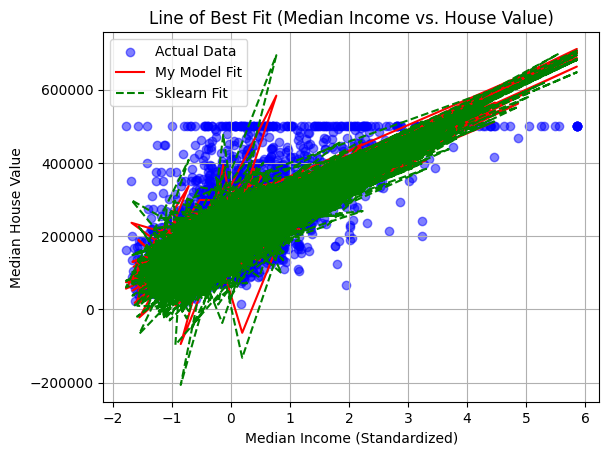

In [20]:
income_feature_index = feature_names.tolist().index('median_income')

plt.scatter(X_test[:, income_feature_index], y_test, color="blue", alpha=0.5, label="Actual Data")

plt.plot(X_test[:,income_feature_index], my_predictions, color="red", label="My Model Fit")
plt.plot(X_test[:,income_feature_index], sklearn_predictions, color="green", linestyle="--", label="Sklearn Fit")

plt.xlabel("Median Income (Standardized)")
plt.ylabel("Median House Value")
plt.title("Line of Best Fit (Median Income vs. House Value)")
plt.legend()
plt.grid(True)
plt.show()